In [20]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_parquet("yellow_tripdata_2025-09.parquet")

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,2,2025-09-01 00:19:20,2025-09-01 00:45:17,1.0,9.92,1.0,N,138,114,1,42.9,6.0,0.5,10.73,0.0,1.0,66.13,2.5,1.75,0.75
1,2,2025-09-01 00:15:20,2025-09-01 00:26:08,2.0,6.82,1.0,N,93,157,1,26.8,1.0,0.5,5.86,0.0,1.0,35.16,0.0,0.00,0.00
2,2,2025-09-01 00:06:07,2025-09-01 00:22:23,1.0,3.95,1.0,N,68,13,1,19.8,1.0,0.5,5.11,0.0,1.0,30.66,2.5,0.00,0.75
3,2,2025-09-01 00:49:47,2025-09-01 01:04:49,1.0,3.14,1.0,N,234,87,1,17.7,1.0,0.5,3.52,0.0,1.0,26.97,2.5,0.00,0.75
4,2,2025-09-01 00:05:00,2025-09-01 00:15:32,6.0,2.81,1.0,N,230,151,1,14.9,1.0,0.5,4.13,0.0,1.0,24.78,2.5,0.00,0.75


In [5]:
df.shape

(4251015, 20)

# Duration

In [ ]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [9]:
df['duration'].mean()

18.594050483629612

In [10]:
df['duration'].std()

28.11382226747945

# Dropping outliers

In [ ]:
len(df[(df['duration'] >= 1) & (df['duration'] <= 60)]) / len(df) * 100

95.07917520874426

In [12]:
df = df[(df['duration'] >= 1) & (df['duration'] <= 60)].copy()

# One-hot encoding

In [14]:
categorical = ['PULocationID', 'DOLocationID']
df[categorical] = df[categorical].astype(str)
train_dicts = df[categorical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [15]:
print(X_train.shape)

(4041830, 520)


# Train model

In [16]:
target = 'duration'
y_train = df[target].values

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
print(f"RMSE: {mean_squared_error(y_train, y_pred)}")

RMSE: 91.33475607586452


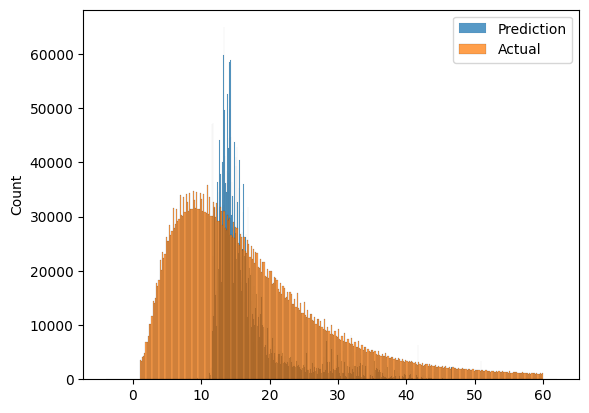

In [21]:
sns.histplot(y_pred, label='Prediction')
sns.histplot(y_train, label='Actual')
plt.legend();

# Evaluating the model

In [25]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)
    df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
    df = df[(df['duration'] >= 1) & (df['duration'] <= 60)].copy()
    df[categorical] = df[categorical].astype(str)
    return df

In [26]:
df_val = read_data("yellow_tripdata_2025-09.parquet")
val_dict = df_val[categorical].to_dict(orient='records')

In [27]:
X_val = dv.transform(val_dict)
y_val = df_val['duration'].values

In [28]:
y_pred = lr.predict(X_val)
print(f"RMSE: {mean_squared_error(y_val, y_pred)}")

RMSE: 91.33475607586452
